<a href="https://colab.research.google.com/github/Sriharshitha842/ML_LAB/blob/main/ML_lab_10_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from termcolor import colored, cprint
%matplotlib inline

In [78]:
testdata = pd.read_csv('/content/sample_data/test.csv')
traindata = pd.read_csv('/content/sample_data/train.csv')

In [79]:
print(testdata)

      tBodyAcc-mean()-X  tBodyAcc-mean()-Y  ...  subject          Activity
0              0.257178          -0.023285  ...        2          STANDING
1              0.286027          -0.013163  ...        2          STANDING
2              0.275485          -0.026050  ...        2          STANDING
3              0.270298          -0.032614  ...        2          STANDING
4              0.274833          -0.027848  ...        2          STANDING
...                 ...                ...  ...      ...               ...
2942           0.310155          -0.053391  ...       24  WALKING_UPSTAIRS
2943           0.363385          -0.039214  ...       24  WALKING_UPSTAIRS
2944           0.349966           0.030077  ...       24  WALKING_UPSTAIRS
2945           0.237594           0.018467  ...       24  WALKING_UPSTAIRS
2946           0.153627          -0.018437  ...       24  WALKING_UPSTAIRS

[2947 rows x 563 columns]


In [80]:
print(traindata)

      tBodyAcc-mean()-X  tBodyAcc-mean()-Y  ...  subject          Activity
0              0.288585          -0.020294  ...        1          STANDING
1              0.278419          -0.016411  ...        1          STANDING
2              0.279653          -0.019467  ...        1          STANDING
3              0.279174          -0.026201  ...        1          STANDING
4              0.276629          -0.016570  ...        1          STANDING
...                 ...                ...  ...      ...               ...
7347           0.299665          -0.057193  ...       30  WALKING_UPSTAIRS
7348           0.273853          -0.007749  ...       30  WALKING_UPSTAIRS
7349           0.273387          -0.017011  ...       30  WALKING_UPSTAIRS
7350           0.289654          -0.018843  ...       30  WALKING_UPSTAIRS
7351           0.351503          -0.012423  ...       30  WALKING_UPSTAIRS

[7352 rows x 563 columns]


In [81]:
def predict(w,b,x,y):
    pred = np.dot(x,w)+b
    n = x.shape[0]
    pred[pred>0] = 1
    pred[pred<0] = -1
    t = np.sum(pred == y)
    acc = t/n
    return acc*100

In [82]:
def train_svm(x,y,lr,lambd,epochs = 100): 
    n = x.shape[0]
    w = np.zeros([len(x[0]),1])
    loss_ar = []
    b = 0
    acc_ar = []
    acc_ar.append(0)
    for epoch in range(epochs):
        dw = np.zeros(w.shape)
        z = np.maximum(0,1-y*(np.dot(x,w)+b))
        loss = np.sum(z) + lambd*np.sum(w*w)/2
        loss_ar.append(loss)
        dw = lambd*w - 1/n *(np.sum((x*y),axis = 0).reshape(-1,1))
        q = x*y
        for i in range(n):
            if(z[i] == 0):
                q[i][:] = 0
        dw = lambd*w - (np.sum(q,axis = 0).reshape(-1,1))/n
        w = w - lr * dw
        acc = predict(w,b,x,y)
        acc_ar.append(acc)
        b = lr*np.sum(y - np.dot(x,w))/n
        if(loss<1):
            cprint("epoch {}, loss = {}, accuracy = {}.\nTerminating due to reaching threshold of loss < 1".format(epoch+1,loss,acc), 'blue',attrs=['bold'])
            return w,b,loss_ar,acc_ar
        if(acc>99):
            cprint("epoch {}, loss = {}, accuracy = {}.\nTerminating due to reaching threshold of train accuracy > 99".format(epoch+1,loss,acc), 'blue',attrs=['bold'])
            return w,b,loss_ar,acc_ar
        if(not epoch):
            print("epoch {}, loss = {}, accuracy = {}.".format(epoch,loss,acc))
        elif(epoch <101):
            if(epoch%99 == 0):
                print("epoch {}, loss = {}, accuracy = {}.".format(epoch+1,loss,acc))
        elif(epoch%499 ==0):
            print("epoch {}, loss = {}, accuracy = {}.".format(epoch+1,loss,acc))
        
    return w,b,loss_ar,acc_ar

In [83]:
def train_multi_svm(train_set,test_set,y_train,y_test):
    accuracy = []
    arr = len(np.unique(y_test))
    loss_t = []
    parameters = {}
    cprint("Found {} unique labels. Training {} Support vector machines".format(arr,arr),attrs=['bold'])
    for i in range(len(np.unique(y_test))):         #one vs all method(6 different labels are there hence 6 SVM)
        y = y_train.copy()
        y[y != i] = -1
        y[y == i] = 1
        y = y.reshape(-1,1)
        yt = y_test.copy()    #yt = labels for test data 
        yt[yt != i] = -1
        yt[yt == i] = 1
        yt = yt.reshape(-1,1)
        cprint("training SVM {} of 6".format(i+1), attrs=['bold'])
        w,b,loss,acc = train_svm(train_set.to_numpy(),y,0.01,0.1,1000)  
        cprint("Test set accuracy = {}".format(predict(w,b,test_set,yt)), attrs=['bold'])
        parameters[i] = {}
        parameters[i]["accuracy"] = acc
        parameters[i]["test_accuracy"] = predict(w,b,test_set,yt)
        parameters[i]["loss"] = loss
        parameters[i]["w"] = w
        parameters[i]["b"] = b
    return parameters

In [84]:
le = LabelEncoder()
le.fit(['WALKING_UPSTAIRS', 'SITTING', 'LAYING', 'WALKING_DOWNSTAIRS', 'WALKING', 'STANDING'])

y_train = traindata["Activity"]
y_train = le.fit_transform(y_train)

y_test = testdata["Activity"]
y_test = le.fit_transform(y_test)

traindata = traindata.drop(["Activity"],axis = 1)
train_set = traindata.drop(["subject"],axis = 1)
testdata = testdata.drop(["Activity"],axis = 1)
test_set = testdata.drop(["subject"],axis =1)

In [85]:
parameters = train_multi_svm(train_set,test_set,y_train,y_test)

Found 6 unique labels. Training 6 Support vector machines
training SVM 1 of 6
epoch 0, loss = 7352.0, accuracy = 80.83514689880305.
epoch 33, loss = 1867.8084593498118, accuracy = 99.10228509249184.
Terminating due to reaching threshold of train accuracy > 99
Test set accuracy = 98.30335934848999
training SVM 2 of 6
epoch 0, loss = 7352.0, accuracy = 82.48095756256801.
epoch 100, loss = 2372.0724933633783, accuracy = 82.50816104461371.
epoch 500, loss = 1858.0507856110503, accuracy = 89.89390642002176.
epoch 999, loss = 1564.1127232960614, accuracy = 91.879760609358.
Test set accuracy = 92.26331862911435
training SVM 3 of 6
epoch 0, loss = 7352.0, accuracy = 81.28400435255713.
epoch 100, loss = 2294.1519861998036, accuracy = 81.40642002176278.
epoch 500, loss = 1441.5690709544076, accuracy = 93.37595212187159.
epoch 999, loss = 1294.915580367408, accuracy = 93.93362350380848.
Test set accuracy = 93.79029521547336
training SVM 4 of 6
epoch 0, loss = 7352.0, accuracy = 83.21545157780196.

In [86]:
print(parameters.keys())
print(parameters[0].keys())

dict_keys([0, 1, 2, 3, 4, 5])
dict_keys(['accuracy', 'test_accuracy', 'loss', 'w', 'b'])


SVM 0 accuracy = 98.30335934848999
SVM 1 accuracy = 92.26331862911435
SVM 2 accuracy = 93.79029521547336
SVM 3 accuracy = 99.01594842212418
SVM 4 accuracy = 96.09772650152698
SVM 5 accuracy = 94.57074991516797
Average accuracy = 95.67356633864948


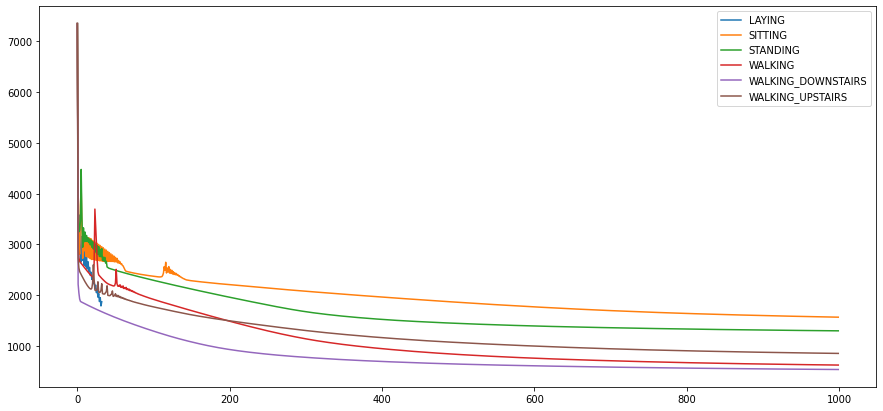

In [88]:
avg = 0
fig, axes = plt.subplots(1, 1, figsize=(15,7))
for i in range(6):
    print("SVM {} accuracy = {}".format(i,parameters[i]["test_accuracy"]))
    avg =avg + parameters[i]["test_accuracy"]
    axes.plot(parameters[i]["loss"])
axes.legend(le.inverse_transform([0,1,2,3,4,5]))
cprint("Average accuracy = {}".format(avg/6),'blue',attrs=['bold'])